In [2]:
import numpy as np
import pandas as pd

from multiglm.data.dataset_loader import *
from multiglm.features.design_matrix_generator import *
from multiglm.features.design_matrix_generator import *

%load_ext autoreload
%autoreload 2

Next steps:

[X] move into a class

-- break -- 

[ ] integrate into experiment.py

* [X] fix imports in experiment.py

* [X] write a sub method get_data that takes in params. Look for params.animals and params.data_type. call this and return self.df

-- break -- 

* [X] integrate into generate design matrix for animal

    * [X] test with base class & debug (choice might be incorrect?)
    
    * [ ] test with experiment init

    * [ ] clean up experiment init (or at least write a full doc of all param options)


In [3]:
DatasetLoader.determine_load_function?

Signature: DatasetLoader.determine_load_function(self)
Docstring:
Given the data type requested by the user, determine the
appropriate function to load the data.

Options
-------
    - new_trained: Only trained (i.e. latest stage, full performance)
        data from the new dataset see `crated_trained_threshold_df.ipynb`
        for more info
    - new_all: all data from the new dataset
    - new_match_old_viols: New dataset truncated to session 200 to
        closely resemble the old dataset where violations stopped
        being tracked at session 200
    - old_viols: the old, public dataset until sessions stopped being
        tracked at session 200
Returns
-------
    function: The function to load the data
File:      ~/Desktop/github/animal-learning/src/multiglm/data/dataset_loader.py
Type:      function

## Single animal validate designm matrix

In [16]:
dl = DatasetLoader(["W078"])
df = dl.load_data()

Loading data for animal ids:  ['W078']


In [32]:
dmg = DesignMatrixGenerator()

y = dmg.one_hot_encode_labels(df)

for i in range(10):
    print(f"choice: {df.choice.iloc[i]}, one hot: {y[i]}")

choice: 2, one hot: [False False  True]
choice: 2, one hot: [False False  True]
choice: 2, one hot: [False False  True]
choice: 0, one hot: [ True False False]
choice: 0, one hot: [ True False False]
choice: 0, one hot: [ True False False]
choice: 0, one hot: [ True False False]
choice: 1, one hot: [False  True False]
choice: 1, one hot: [False  True False]
choice: 1, one hot: [False  True False]


In [38]:
df.correct_side.describe()

df.correct_side.value_counts()

correct_side
1    43783
0    36799
Name: count, dtype: int64

In [42]:
df.choice.replace({0: -1, 2: 0}).astype(int).shift()

1180808    NaN
1180809    0.0
1180810    0.0
1180811    0.0
1180812   -1.0
          ... 
1261385   -1.0
1261386    1.0
1261387    0.0
1261388    1.0
1261389    1.0
Name: choice, Length: 80582, dtype: float64

In [43]:
X = dmg.generate_base_matrix(df, return_labels=False)

X.describe()

,bias,session,prev_violation,s_a,s_b,prev_sound_avg,prev_correct,prev_choice
count,80582.0,80582.000000,80582.000000,8.058200e+04,8.058200e+04,80582.000000,80582.000000,80582.000000
mean,1.0,243.563736,0.101090,8.394389e-17,-5.442245e-16,-0.012969,0.078032,0.000794
std,0.0,74.804365,0.301449,1.000000e+00,1.000000e+00,0.941379,0.943189,0.946411
min,1.0,107.000000,0.000000,-1.672853e+00,-1.600199e+00,-1.344193,-1.000000,-1.000000
25%,1.0,182.000000,0.000000,-8.546128e-01,-7.828460e-01,-0.448735,-1.000000,-1.000000
50%,1.0,244.000000,0.000000,-3.637212e-02,3.450689e-02,-0.000000,0.000000,0.000000
75%,1.0,310.000000,0.000000,7.818685e-01,8.518598e-01,0.446724,1.000000,1.000000
max,1.0,366.000000,1.000000,1.600109e+00,1.669213e+00,1.342182,1.000000,1.000000


In [44]:
X.prev_choice.value_counts()

prev_choice
 1.0    36120
-1.0    36056
 0.0     8406
Name: count, dtype: int64

In [39]:
X.prev_correct.value_counts()

prev_correct
 1.0    39232
-1.0    32944
 0.0     8406
Name: count, dtype: int64

In [4]:
dl = DatasetLoader()
df = dl.load_data()

Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']


In [6]:


filter_params = {"prev_violation": 0}
dm = DesignMatrixGeneratorFilteredHistory()

In [7]:
X, y = dm.generate_design_matrix(df.query("animal_id == 'W051'"), filter_params)

X.head()

,bias,session,prev_violation,s_a,s_b,prev_sound_avg,prev_correct,prev_choice
0,1,326,0.0,-1.649967,-0.834803,0.000000,0.0,0.0
1,1,326,1.0,-1.649967,-0.834803,-0.000000,-0.0,2.0
2,1,326,1.0,0.019421,-0.834803,-0.000000,-0.0,2.0
3,1,326,1.0,-0.815273,0.000556,-0.000000,0.0,2.0
4,1,326,0.0,0.854115,0.000556,-0.445716,-1.0,-1.0


In [8]:
pd.get_dummies(df["choice"])

,0,1,2
0,False,False,True
1,False,False,True
2,False,False,True
3,True,False,False
4,False,True,False
...,...,...,...
2144770,False,False,True
2144771,False,False,True
2144772,True,False,False
2144773,False,True,False


### Experiment

In [9]:
from multiglm.experiments.experiment import *
from multiglm.experiments.experiment_compare_models import *
from multiglm.models.multiclass_logistic_regression import *
from multiglm.data import ANIMAL_IDS

In [10]:
model_config = {
    "psytrack_features": {  # MODEL 1
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {"prev_violation": -1},  # no filter & drop column
    },
    "prev_violation": {  # MODEL 2
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {"prev_violation": 0},  # no filter
    },
}

params = {
    "animals": ANIMAL_IDS,
    "sigmas": [0.07, 0.13],  # , 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "eval_train": True,
    "tau_columns": ["prev_violation"],
    "model_config": model_config,
    "min_training_stage": 4,
}

In [11]:
experiment = ExperimentCompareModels(params)

Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']


In [12]:
experiment.run()

minimum training stage is  4

 >>>> evaluating animal W051 <<<<

 ***** evaluating model psytrack_features w/ sigma 0.07 *****
         Current function value: 64967.543086
         Iterations: 22
         Function evaluations: 39
         Gradient evaluations: 39

 ***** evaluating model psytrack_features w/ sigma 0.13 *****
         Current function value: 64731.400515
         Iterations: 23
         Function evaluations: 78
         Gradient evaluations: 66

 ***** evaluating model prev_violation w/ sigma 0.07 *****
         Current function value: 64827.912936
         Iterations: 24
         Function evaluations: 35
         Gradient evaluations: 35

 ***** evaluating model prev_violation w/ sigma 0.13 *****
         Current function value: 64572.839179
         Iterations: 23
         Function evaluations: 34
         Gradient evaluations: 34

 >>>> evaluating animal W060 <<<<

 ***** evaluating model psytrack_features w/ sigma 0.07 *****
Optimization terminated successfully.
  

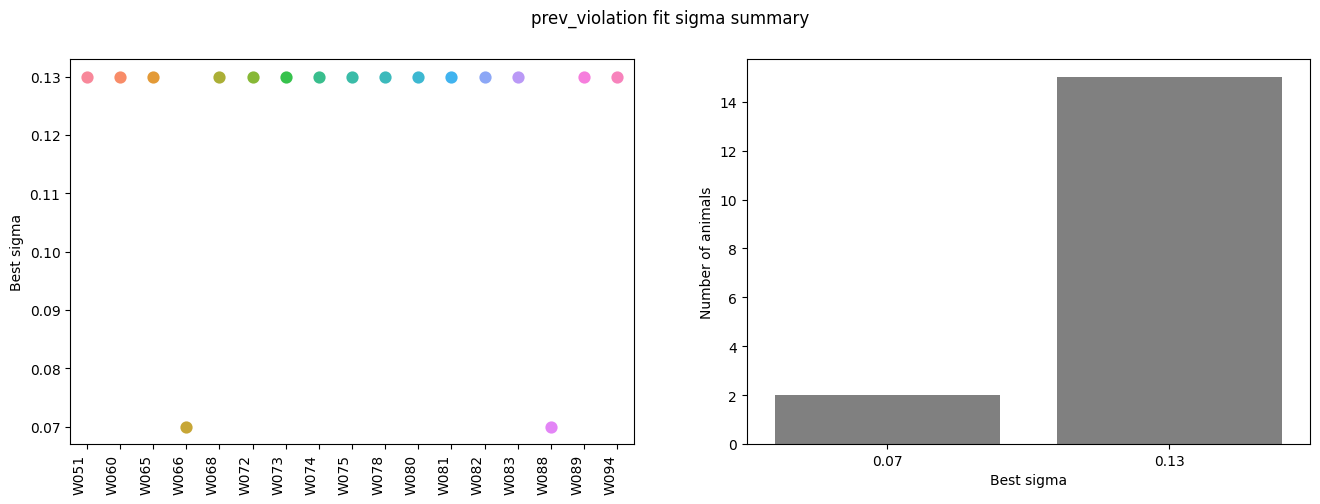

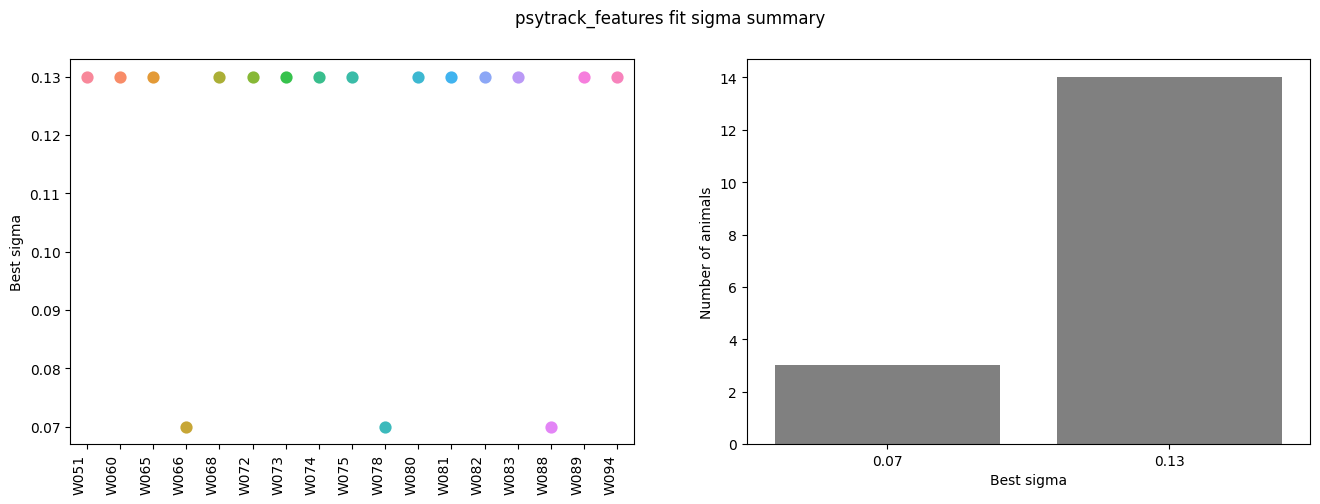

In [13]:
from multiglm.visualizations.model_visualizer import *

mvc = ModelVisualizerCompare(experiment)
df = mvc.find_best_fit(group="model_name")
for model_name, model_df in df.groupby("model_name"):
    mvc.plot_sigma_summary(model_df, title=f"{model_name} fit sigma summary")

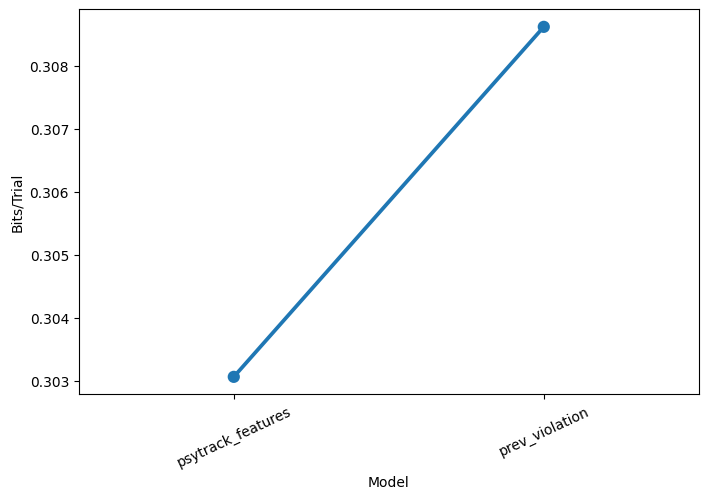

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue=None,
    ax=ax,
    order=["psytrack_features", "prev_violation"],
    errorbar=None,
)